In [1]:
import pandas as pd
import numpy as np

In [2]:
df_fraud=pd.read_csv('fraud_preprocessed.csv')
df_credit=pd.read_csv('credit_clean.csv')

In [3]:
df_fraud.head()

user_id          signup_time        purchase_time  purchase_value  \
0        2  2015-01-11 03:47:13  2015-02-21 10:03:37        0.310345   
1        4  2015-06-02 16:40:57  2015-09-26 21:32:16        0.220690   
2        8  2015-05-28 07:53:06  2015-08-13 11:53:07        0.262069   
3       12  2015-01-10 06:25:12  2015-03-04 20:56:37        0.179310   
4       16  2015-02-03 13:48:23  2015-03-12 12:46:23        0.000000   

       device_id       age  ip_address  class  hour_of_day  day_of_week  ...  \
0  FGBQNDNBETFJJ  0.120690   880217484      0           10            5  ...   
1  MKFUIVOHLJBYN  0.344828  2785906106      0           21            5  ...   
2  SCQGQALXBUQZJ  0.120690   356056736      0           11            3  ...   
3  MSNWCFEHKTIOY  0.017241  2985180352      0           20            2  ...   
4  FROZWSSWOHZBE  0.241379   578312545      0           12            3  ...   

   country_United States  country_Uruguay  country_Uzbekistan  \
0                    1.0              0.0                 0.0   
1                    0.0              0.0                 0.0   
2                    1.0              0.0                 0.0   
3                    0.0              0.0                 0.0   
4                    1.0              0.0                 0.0   

   country_Vanuatu  country_Venezuela  country_Viet Nam  \
0              0.0                0.0               0.0   
1              0.0                0.0               0.0   
2              0.0                0.0               0.0   
3              0.0                0.0               0.0   
4              0.0                0.0               0.0   

   country_Virgin Islands (U.S.)  country_Yemen  country_Zambia  \
0                            0.0            0.0             0.0   
1                            0.0            0.0             0.0   
2                            0.0            0.0             0.0   
3                            0.0            0.0             0.0   
4                            0.0            0.0             0.0   

   country_Zimbabwe  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  

[5 rows x 203 columns]

In [4]:
df_credit.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62    0.0  
1  0.125895 -0.008983  0.014724    2.69    0.0  
2 -0.139097 -0.055353 -0.059752  378.66    0.0  
3 -0.221929  0.062723  0.061458  123.50    0.0  
4  0.502292  0.219422  0.215153   69.99    0.0  

[5 rows x 31 columns]

In [5]:
pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
import mlflow
import mlflow.sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, SimpleRNN, LSTM

In [7]:
def preprocess_fraud_data(df):
    df['signup_time'] = pd.to_datetime(df['signup_time'])
    df['purchase_time'] = pd.to_datetime(df['purchase_time'])
    df = df.drop(['signup_time', 'purchase_time', 'user_id', 'device_id'], axis=1)
    return df

df_fraud = preprocess_fraud_data(df_fraud)

In [8]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_fraud = pd.DataFrame(imputer.fit_transform(df_fraud), columns=df_fraud.columns)
df_credit = pd.DataFrame(imputer.fit_transform(df_credit), columns=df_credit.columns)

In [9]:
# Ensure target variables are binary
df_fraud['class'] = df_fraud['class'].astype(int)
df_credit['Class'] = df_credit['Class'].astype(int)

In [10]:
# Separate features and target for Fraud_Data
X_fraud = df_fraud.drop('class', axis=1)
y_fraud = df_fraud['class']

# Separate features and target for creditcard data
X_credit = df_credit.drop('Class', axis=1)
y_credit = df_credit['Class']

# Train-test split for Fraud_Data
X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = train_test_split(X_fraud, y_fraud, test_size=0.3, random_state=42)

# Train-test split for creditcard data
X_credit_train, X_credit_test, y_credit_train, y_credit_test = train_test_split(X_credit, y_credit, test_size=0.3, random_state=42)

In [11]:
# Model training and evaluation function
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Performance of {model_name}:")
    print(classification_report(y_test, y_pred))

    # Log model and metrics with MLflow
    with mlflow.start_run():
        mlflow.sklearn.log_model(model, model_name)
        mlflow.log_param("model_type", model_name)
        mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
        mlflow.log_metric("precision", precision_score(y_test, y_pred))
        mlflow.log_metric("recall", recall_score(y_test, y_pred))
        mlflow.log_metric("f1_score", f1_score(y_test, y_pred))

In [12]:
# Logistic Regression
log_reg_fraud = LogisticRegression()
train_and_evaluate_model(log_reg_fraud, X_fraud_train, y_fraud_train, X_fraud_test, y_fraud_test, "Logistic Regression")



Performance of Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1256
           1       0.00      0.00      0.00       161

    accuracy                           0.89      1417
   macro avg       0.44      0.50      0.47      1417
weighted avg       0.79      0.89      0.83      1417



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__

In [13]:
# Logistic Regression
log_reg_credit = LogisticRegression()
train_and_evaluate_model(log_reg_credit, X_credit_train, y_credit_train, X_credit_test, y_credit_test, "Logistic Regression")



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance of Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2383
           1       0.71      1.00      0.83         5

    accuracy                           1.00      2388
   macro avg       0.86      1.00      0.92      2388
weighted avg       1.00      1.00      1.00      2388



In [14]:
# Decision Tree
dt_fraud = DecisionTreeClassifier()
train_and_evaluate_model(dt_fraud, X_fraud_train, y_fraud_train, X_fraud_test, y_fraud_test, "Decision Tree")



Performance of Decision Tree:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1256
           1       0.21      0.20      0.20       161

    accuracy                           0.82      1417
   macro avg       0.55      0.55      0.55      1417
weighted avg       0.82      0.82      0.82      1417



In [15]:
# Decision Tree
dt_credit = DecisionTreeClassifier()
train_and_evaluate_model(dt_credit, X_credit_train, y_credit_train, X_credit_test, y_credit_test, "Decision Tree")



Performance of Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2383
           1       1.00      0.80      0.89         5

    accuracy                           1.00      2388
   macro avg       1.00      0.90      0.94      2388
weighted avg       1.00      1.00      1.00      2388



In [16]:
# Random Forest
rf_credit = RandomForestClassifier()
train_and_evaluate_model(rf_credit, X_credit_train, y_credit_train, X_credit_test, y_credit_test, "Random Forest")



Performance of Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2383
           1       1.00      0.80      0.89         5

    accuracy                           1.00      2388
   macro avg       1.00      0.90      0.94      2388
weighted avg       1.00      1.00      1.00      2388



In [17]:
# Random Forest
rf_fraud = RandomForestClassifier()
train_and_evaluate_model(rf_fraud, X_fraud_train, y_fraud_train, X_fraud_test, y_fraud_test, "Random Forest")



Performance of Random Forest:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1256
           1       1.00      0.11      0.19       161

    accuracy                           0.90      1417
   macro avg       0.95      0.55      0.57      1417
weighted avg       0.91      0.90      0.86      1417



In [18]:
# Gradient Boosting
gb_fraud = GradientBoostingClassifier()
train_and_evaluate_model(gb_fraud, X_fraud_train, y_fraud_train, X_fraud_test, y_fraud_test, "Gradient Boosting")



Performance of Gradient Boosting:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1256
           1       0.25      0.01      0.02       161

    accuracy                           0.88      1417
   macro avg       0.57      0.50      0.48      1417
weighted avg       0.81      0.88      0.83      1417



In [19]:
# Gradient Boosting
gb_credit = GradientBoostingClassifier()
train_and_evaluate_model(gb_credit,  X_credit_train, y_credit_train, X_credit_test, y_credit_test, "Gradient Boosting")



Performance of Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2383
           1       0.80      0.80      0.80         5

    accuracy                           1.00      2388
   macro avg       0.90      0.90      0.90      2388
weighted avg       1.00      1.00      1.00      2388



In [20]:
# Multi-Layer Perceptron (MLP)
mlp_credit = MLPClassifier()
train_and_evaluate_model(mlp_credit, X_credit_train, y_credit_train, X_credit_test, y_credit_test, "MLP")



Performance of MLP:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2383
           1       0.62      1.00      0.77         5

    accuracy                           1.00      2388
   macro avg       0.81      1.00      0.88      2388
weighted avg       1.00      1.00      1.00      2388



In [21]:
# Multi-Layer Perceptron (MLP)
mlp_fraud = MLPClassifier()
train_and_evaluate_model(mlp_fraud, X_fraud_train, y_fraud_train, X_fraud_test, y_fraud_test, "MLP")



Performance of MLP:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1256
           1       0.00      0.00      0.00       161

    accuracy                           0.89      1417
   macro avg       0.44      0.50      0.47      1417
weighted avg       0.79      0.89      0.83      1417



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [22]:
# Neural Network model architectures and training
def train_nn_model(model, X_train, y_train, X_test, y_test, model_name):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

    # Log model and metrics with MLflow
    with mlflow.start_run():
        mlflow.keras.log_model(model, model_name)
        loss, accuracy = model.evaluate(X_test, y_test)
        mlflow.log_metric("accuracy", accuracy)



In [23]:
# Reshape data for CNN and RNN models
X_fraud_train_cnn_rnn = X_fraud_train.values.reshape((X_fraud_train.shape[0], X_fraud_train.shape[1], 1))
X_fraud_test_cnn_rnn = X_fraud_test.values.reshape((X_fraud_test.shape[0], X_fraud_test.shape[1], 1))
X_credit_train_cnn_rnn = X_credit_train.values.reshape((X_credit_train.shape[0], X_credit_train.shape[1], 1))
X_credit_test_cnn_rnn = X_credit_test.values.reshape((X_credit_test.shape[0], X_credit_test.shape[1], 1))



In [24]:
# CNN
cnn_model_fraud = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_fraud_train_cnn_rnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])
train_nn_model(cnn_model_fraud, X_fraud_train_cnn_rnn, y_fraud_train, X_fraud_test_cnn_rnn, y_fraud_test, "CNN")



Epoch 1/10
104/104 [==============================] - 3s 16ms/step - loss: 3174063.0000 - accuracy: 0.8330 - val_loss: 3304455.5000 - val_accuracy: 0.1136
Epoch 2/10
104/104 [==============================] - 2s 16ms/step - loss: 1706627.0000 - accuracy: 0.8179 - val_loss: 771050.9375 - val_accuracy: 0.8864
Epoch 3/10
104/104 [==============================] - 2s 14ms/step - loss: 1168979.1250 - accuracy: 0.8342 - val_loss: 1372973.3750 - val_accuracy: 0.8864
Epoch 4/10
104/104 [==============================] - 2s 21ms/step - loss: 1357905.6250 - accuracy: 0.8252 - val_loss: 385022.3750 - val_accuracy: 0.8864
Epoch 5/10
104/104 [==============================] - 3s 24ms/step - loss: 1269407.1250 - accuracy: 0.8312 - val_loss: 2336193.5000 - val_accuracy: 0.8864
Epoch 6/10
104/104 [==============================] - 2s 17ms/step - loss: 735779.9375 - accuracy: 0.8300 - val_loss: 493479.4688 - val_accuracy: 0.8864
Epoch 7/10
104/104 [==============================] - 2s 17ms/step - loss:

2024/06/24 07:01:25 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


45/45 [==============================] - 0s 4ms/step - loss: 259635.7344 - accuracy: 0.8864


In [25]:
# CNN Model
cnn_model_credit = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_credit_train_cnn_rnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Train and evaluate the CNN model
train_nn_model(cnn_model_credit, X_credit_train_cnn_rnn, y_credit_train, X_credit_test_cnn_rnn, y_credit_test, "CNN")


Epoch 1/10
175/175 [==============================] - 2s 6ms/step - loss: 1.4753 - accuracy: 0.9858 - val_loss: 1.5170 - val_accuracy: 0.9979
Epoch 2/10
175/175 [==============================] - 1s 5ms/step - loss: 1.1396 - accuracy: 0.9926 - val_loss: 0.0344 - val_accuracy: 0.9975
Epoch 3/10
175/175 [==============================] - 1s 5ms/step - loss: 1.3393 - accuracy: 0.9935 - val_loss: 0.1269 - val_accuracy: 0.9975
Epoch 4/10
175/175 [==============================] - 2s 9ms/step - loss: 0.2953 - accuracy: 0.9934 - val_loss: 0.0072 - val_accuracy: 0.9983
Epoch 5/10
175/175 [==============================] - 2s 9ms/step - loss: 0.3666 - accuracy: 0.9957 - val_loss: 0.1170 - val_accuracy: 0.9975
Epoch 6/10
175/175 [==============================] - 1s 6ms/step - loss: 0.0286 - accuracy: 0.9966 - val_loss: 0.0068 - val_accuracy: 0.9992
Epoch 7/10
175/175 [==============================] - 1s 5ms/step - loss: 0.0107 - accuracy: 0.9982 - val_loss: 0.0052 - val_accuracy: 0.9992
Epoch 

2024/06/24 07:01:54 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


75/75 [==============================] - 1s 6ms/step - loss: 0.0443 - accuracy: 0.9862


In [ ]:
# RNN
rnn_model_fraud = Sequential([
    SimpleRNN(100, activation='relu', input_shape=(X_fraud_train_cnn_rnn.shape[1], 1)),
    Dense(1, activation='sigmoid')
])
train_nn_model(rnn_model_fraud, X_fraud_train_cnn_rnn, y_fraud_train, X_fraud_test_cnn_rnn, y_fraud_test, "RNN")



Epoch 1/10
104/104 [==============================] - 8s 54ms/step - loss: 0.5139 - accuracy: 0.9093 - val_loss: 0.3551 - val_accuracy: 0.8864
Epoch 2/10
104/104 [==============================] - 5s 44ms/step - loss: 0.3076 - accuracy: 0.9093 - val_loss: 0.3547 - val_accuracy: 0.8864
Epoch 3/10
104/104 [==============================] - 6s 61ms/step - loss: 0.3096 - accuracy: 0.9093 - val_loss: 0.3863 - val_accuracy: 0.8864
Epoch 4/10
104/104 [==============================] - 5s 43ms/step - loss: 0.3086 - accuracy: 0.9093 - val_loss: 0.3573 - val_accuracy: 0.8864
Epoch 5/10
104/104 [==============================] - 5s 44ms/step - loss: 0.3053 - accuracy: 0.9093 - val_loss: 0.3623 - val_accuracy: 0.8864
Epoch 6/10
104/104 [==============================] - 7s 68ms/step - loss: 0.3071 - accuracy: 0.9093 - val_loss: 0.3563 - val_accuracy: 0.8864
Epoch 7/10
104/104 [==============================] - 6s 53ms/step - loss: 0.3056 - accuracy: 0.9093 - val_loss: 0.3622 - val_accuracy: 0.8864

In [ ]:
# RNN Model
rnn_model_credit = Sequential([
    SimpleRNN(100, activation='relu', input_shape=(X_fraud_train_cnn_rnn.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

# Train and evaluate the RNN model using reshaped fraud data
train_nn_model(rnn_model_credit, X_fraud_train_cnn_rnn, y_fraud_train, X_fraud_test_cnn_rnn, y_fraud_test, "RNN")


In [ ]:
# LSTM
lstm_model_credit = Sequential([
    LSTM(100, activation='relu', input_shape=(X_credit_train_cnn_rnn.shape[1], 1)),
    Dense(1, activation='sigmoid')
])
train_nn_model(lstm_model_credit, X_credit_train_cnn_rnn, y_credit_train, X_credit_test_cnn_rnn, y_credit_test, "LSTM")


In [29]:
# LSTM Model
lstm_model_fraud = Sequential([
    LSTM(100, activation='relu', input_shape=(X_fraud_train_cnn_rnn.shape[1], 1)),
    Dense(1, activation='sigmoid')
])

# Train and evaluate the LSTM model using reshaped fraud data
train_nn_model(lstm_model_fraud, X_fraud_train_cnn_rnn, y_fraud_train, X_fraud_test_cnn_rnn, y_fraud_test, "LSTM")


Epoch 1/10
104/104 [==============================] - 17s 144ms/step - loss: nan - accuracy: 0.9032 - val_loss: nan - val_accuracy: 0.8864
Epoch 2/10
104/104 [==============================] - 15s 141ms/step - loss: nan - accuracy: 0.9093 - val_loss: nan - val_accuracy: 0.8864
Epoch 3/10
104/104 [==============================] - 14s 136ms/step - loss: nan - accuracy: 0.9093 - val_loss: nan - val_accuracy: 0.8864
Epoch 4/10
104/104 [==============================] - 14s 136ms/step - loss: nan - accuracy: 0.9093 - val_loss: nan - val_accuracy: 0.8864
Epoch 5/10
104/104 [==============================] - 15s 145ms/step - loss: nan - accuracy: 0.9093 - val_loss: nan - val_accuracy: 0.8864
Epoch 6/10
104/104 [==============================] - 14s 139ms/step - loss: nan - accuracy: 0.9093 - val_loss: nan - val_accuracy: 0.8864
Epoch 7/10
104/104 [==============================] - 15s 148ms/step - loss: nan - accuracy: 0.9093 - val_loss: nan - val_accuracy: 0.8864
Epoch 8/10
104/104 [=======

2024/06/24 07:09:02 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


45/45 [==============================] - 2s 41ms/step - loss: nan - accuracy: 0.8864


##Task 3 - Model Explainability
Model explainability is crucial for understanding, trust, and debugging in machine learning models. You will use SHAP (SHapley Additive exPlanations) and LIME (Local Interpretable Model-agnostic Explanations) to interpret the models you built for fraud detection.

Using SHAP for Explainability
SHAP values provide a unified measure of feature importance, explaining the contribution of each feature to the prediction.
Installing SHAP
pip install shap
Explaining a Model with SHAP
SHAP Plots
Summary Plot: Provides an overview of the most important features.
Force Plot: Visualizes the contribution of features for a single prediction.
Dependence Plot: This shows the relationship between a feature and the model output.
Using LIME for Explainability
LIME explains individual predictions by approximating the model locally with an interpretable model.
Installing LIME
pip install lime
Explaining a Model with LIME
LIME Plots
Feature Importance Plot: Shows the most influential features for a specific prediction.


In [30]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 9.2 MB/s eta 0:00:00


In [36]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=b6be03b4539c9ee382a6dbf3ff2f439a35eca384951c5b3a6662f9530055cdf9
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


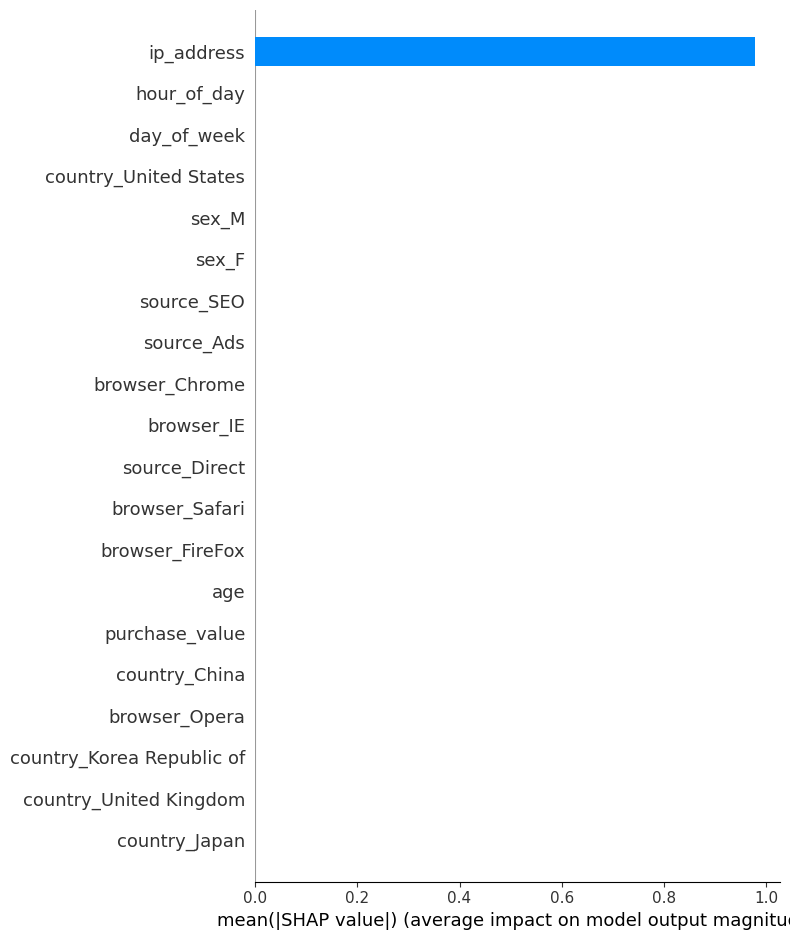

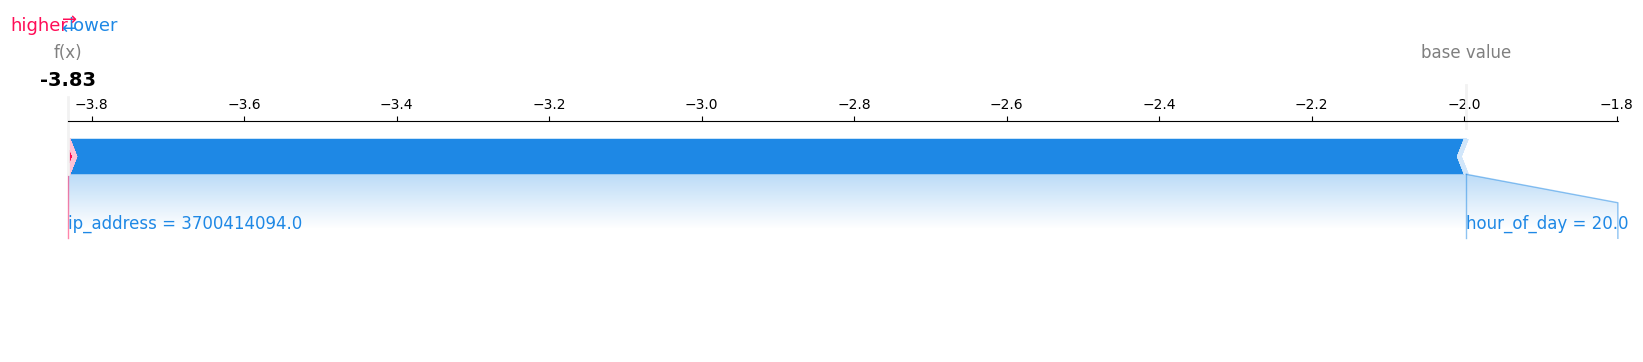

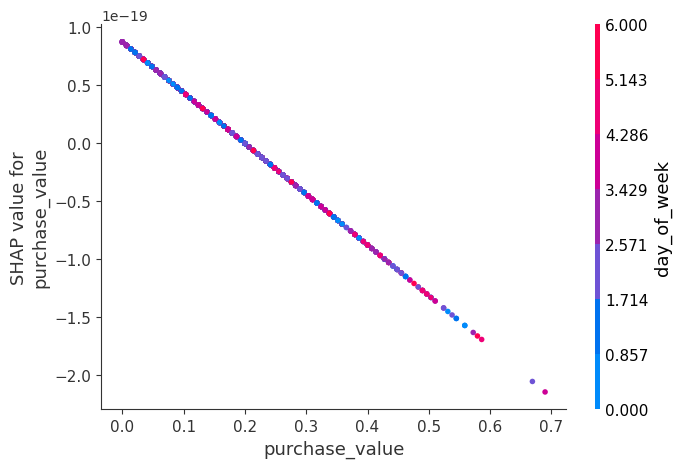

In [35]:
import shap
import matplotlib.pyplot as plt

# Create an explainer for the logistic regression model on fraud detection
explainer = shap.Explainer(log_reg_fraud, X_fraud_test)
shap_values = explainer(X_fraud_test)

# Summary Plot
shap.summary_plot(shap_values, X_fraud_test, plot_type="bar")

# Force Plot for a single prediction (updated)
# Select a single instance from the dataset to explain
instance_index = 0

# Get the expected value and the SHAP values for the selected instance
expected_value = explainer.expected_value
shap_value = shap_values[instance_index]

# Generate the force plot
shap.force_plot(expected_value, shap_value.values, X_fraud_test.iloc[instance_index], matplotlib=True)

# Dependence Plot for a specific feature
feature_idx = 0  # Change this to the index of the feature you're interested in
shap.dependence_plot(feature_idx, shap_values.values, X_fraud_test)


In [37]:
import shap
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

# Function to explain models using SHAP
def explain_model_with_shap(model, X_test, model_name):
    explainer = shap.Explainer(model, X_test)
    shap_values = explainer(X_test)

    # Summary Plot
    plt.title(f'SHAP Summary Plot for {model_name}')
    shap.summary_plot(shap_values, X_test, plot_type="bar")
    plt.show()

    # Force Plot for a single prediction (updated)
    instance_index = 0
    expected_value = explainer.expected_value
    shap_value = shap_values[instance_index]
    plt.title(f'SHAP Force Plot for {model_name}')
    shap.force_plot(expected_value, shap_value.values, X_test.iloc[instance_index], matplotlib=True)
    plt.show()

    # Dependence Plot for a specific feature
    feature_idx = 0  # Change this to the index of the feature you're interested in
    plt.title(f'SHAP Dependence Plot for {model_name}')
    shap.dependence_plot(feature_idx, shap_values.values, X_test)
    plt.show()

# Function to explain models using LIME
def explain_model_with_lime(model, X_train, X_test, model_name):
    explainer = LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=X_train.columns,
        class_names=['Not Fraud', 'Fraud'],
        mode='classification'
    )

    # Choose an instance to explain
    instance_idx = 0
    instance = X_test.iloc[instance_idx]

    # Explain the instance
    explanation = explainer.explain_instance(
        data_row=instance,
        predict_fn=model.predict_proba
    )

    # Show the explanation
    plt.title(f'LIME Explanation for {model_name}')
    explanation.show_in_notebook(show_table=True)
    plt.show()

    # Plot the explanation
    plt.title(f'LIME Explanation Plot for {model_name}')
    explanation.as_pyplot_figure()
    plt.show()




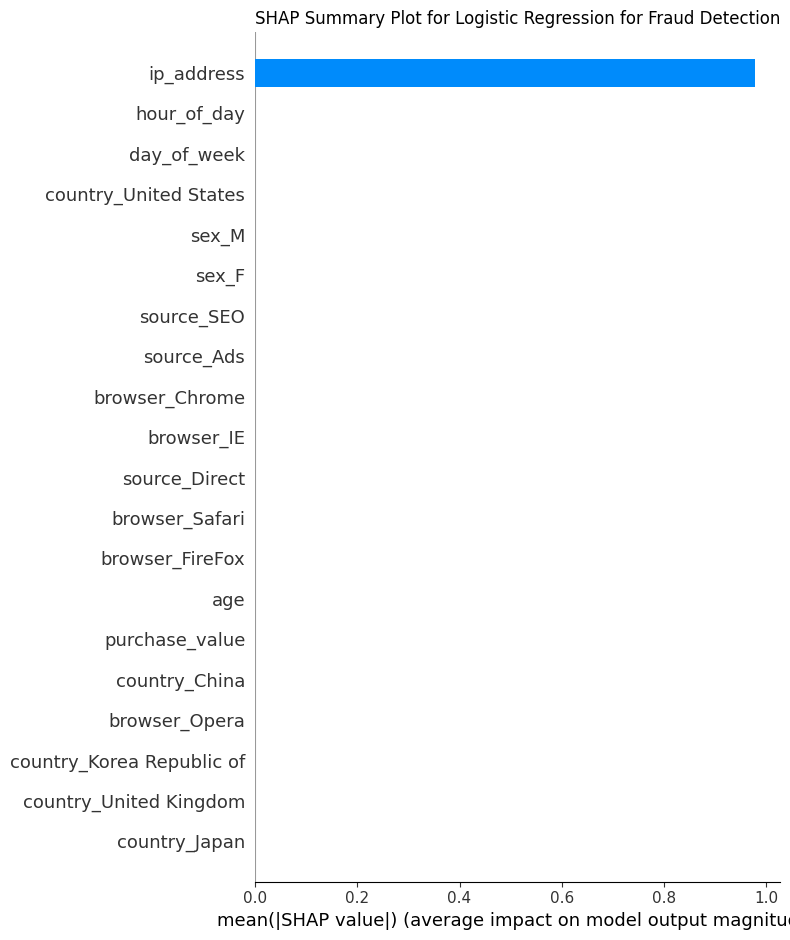

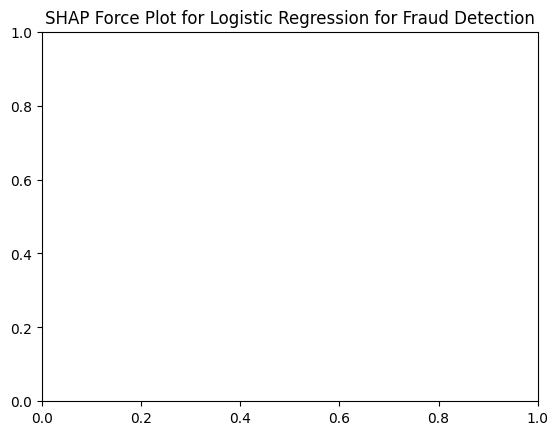

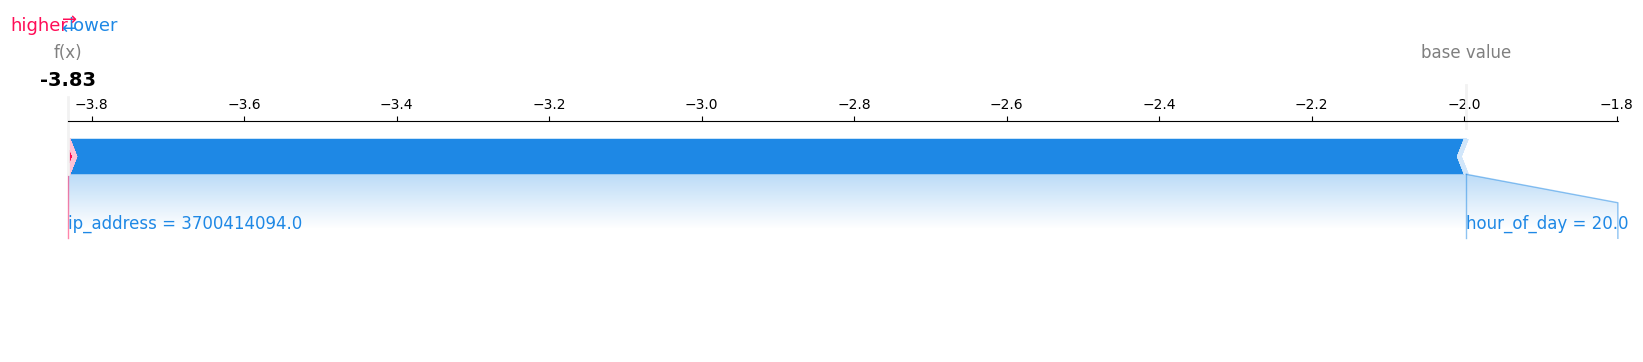

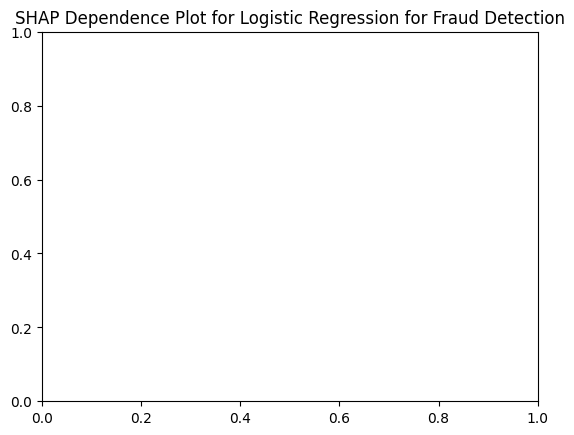

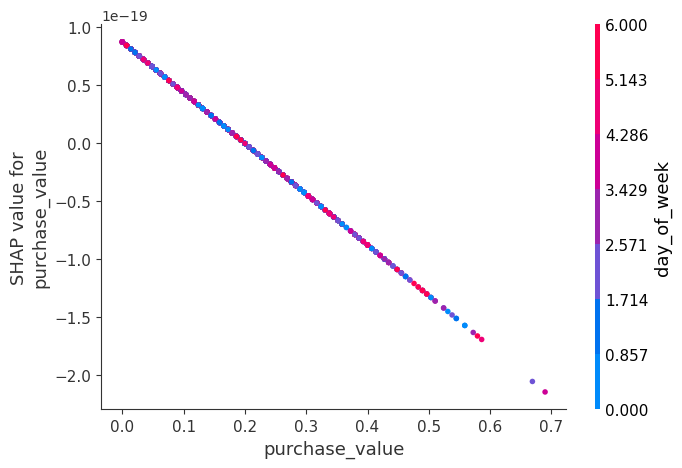

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


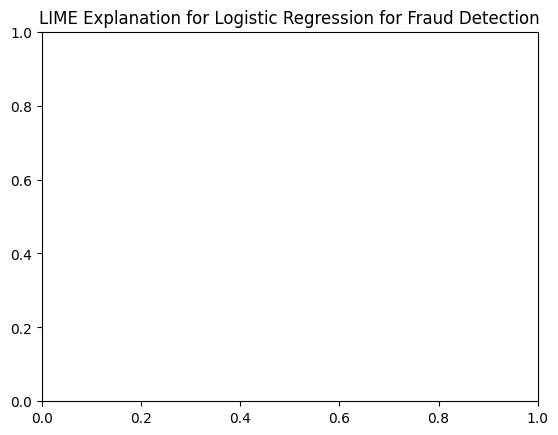

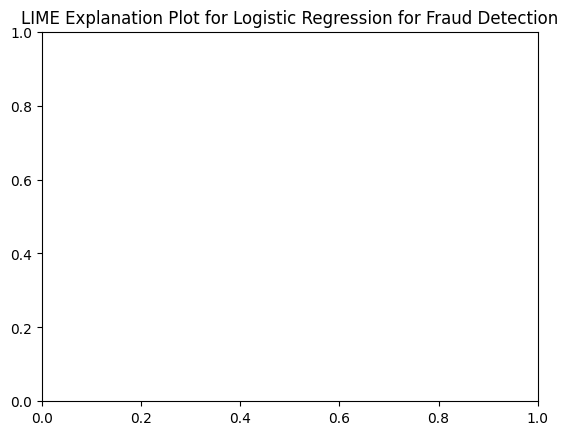

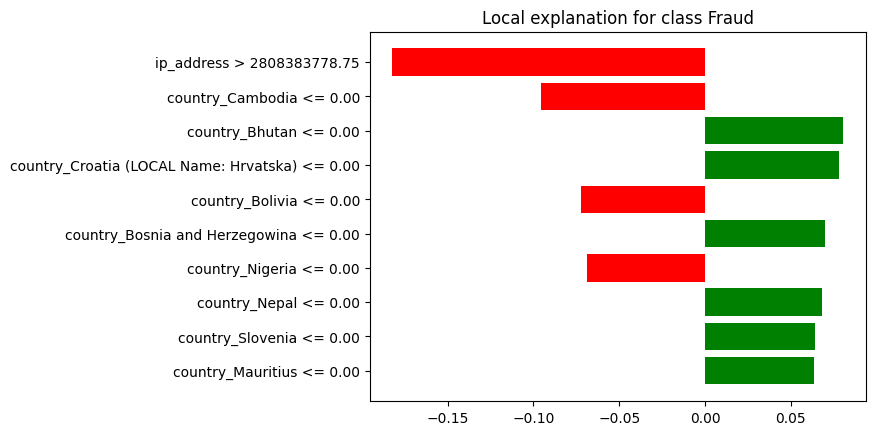

In [38]:
# Using SHAP to explain the logistic regression model for fraud detection
explain_model_with_shap(log_reg_fraud, X_fraud_test, "Logistic Regression for Fraud Detection")

# Using LIME to explain the logistic regression model for fraud detection
explain_model_with_lime(log_reg_fraud, X_fraud_train, X_fraud_test, "Logistic Regression for Fraud Detection")

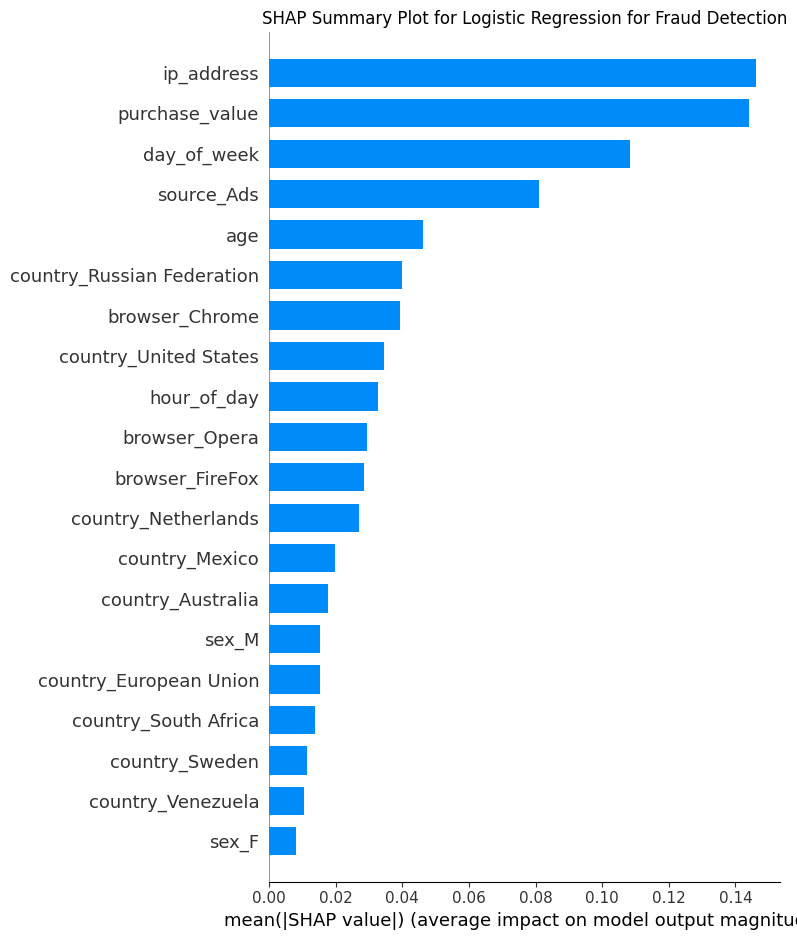

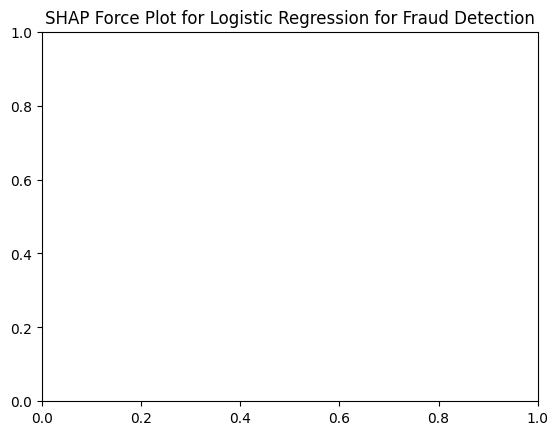

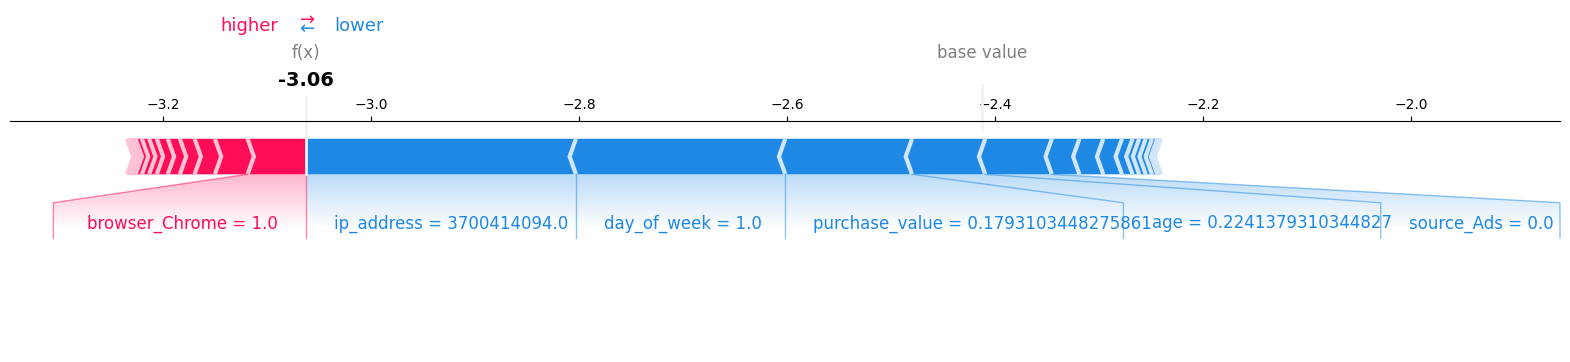

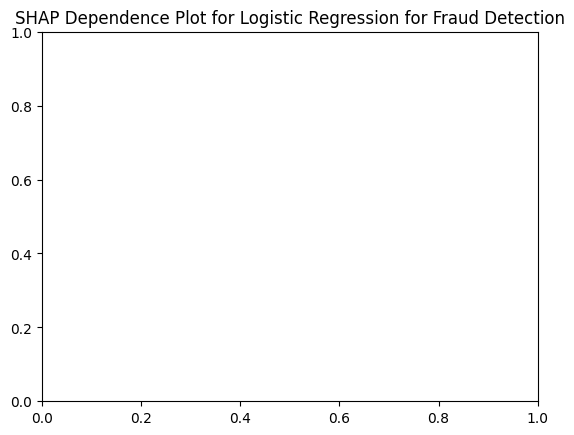

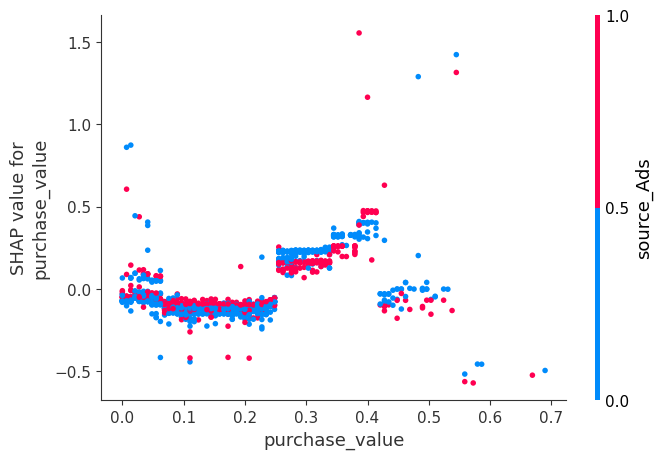

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


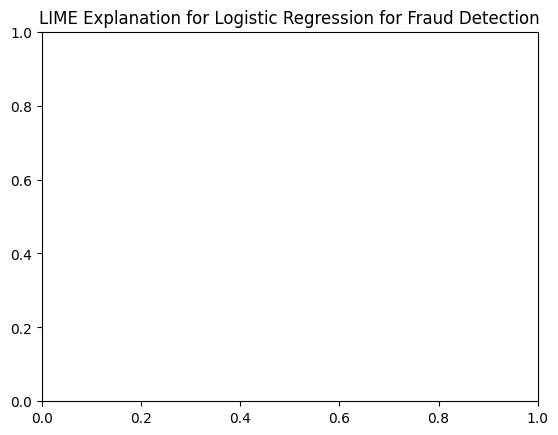

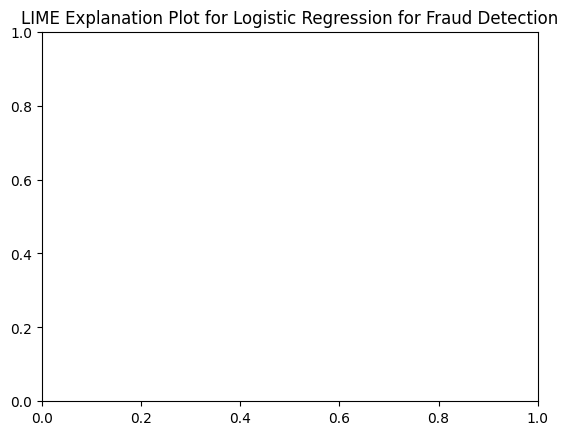

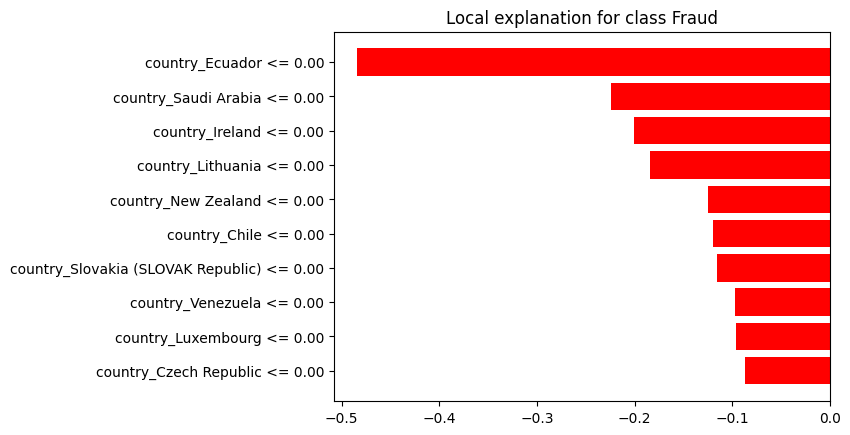

In [51]:
# Using SHAP to explain the logistic regression model for fraud detection
explain_model_with_shap(gb_fraud, X_fraud_test, " Gradient Boosting for Fraud Detection")

# Using LIME to explain the logistic regression model for fraud detection
explain_model_with_lime(gb_fraud, X_fraud_train, X_fraud_test, " Gradient Boosting for Fraud Detection")

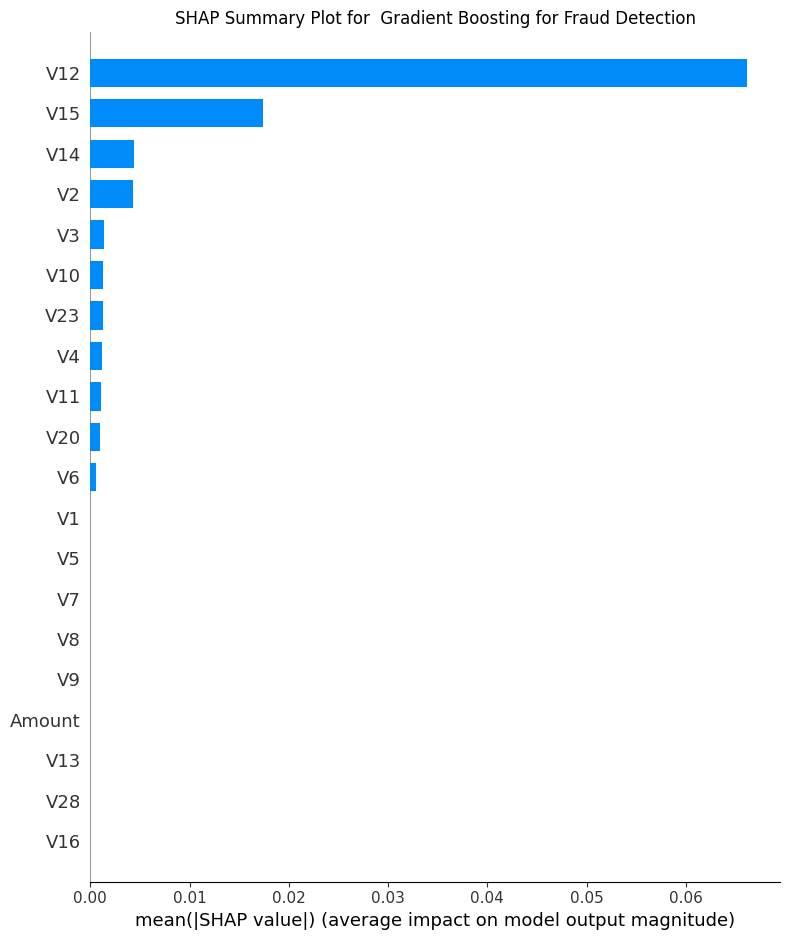

/usr/local/lib/python3.10/dist-packages/shap/plots/_force_matplotlib.py:321: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(min_x, max_x)


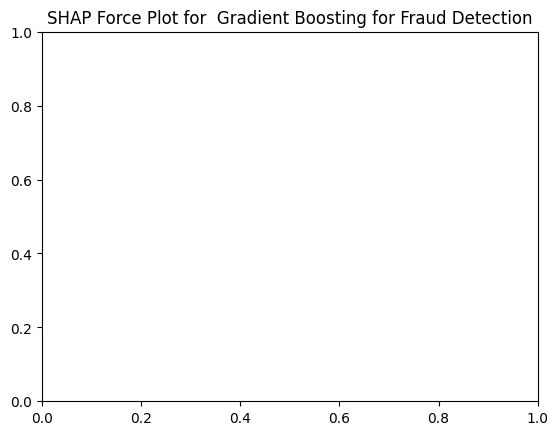

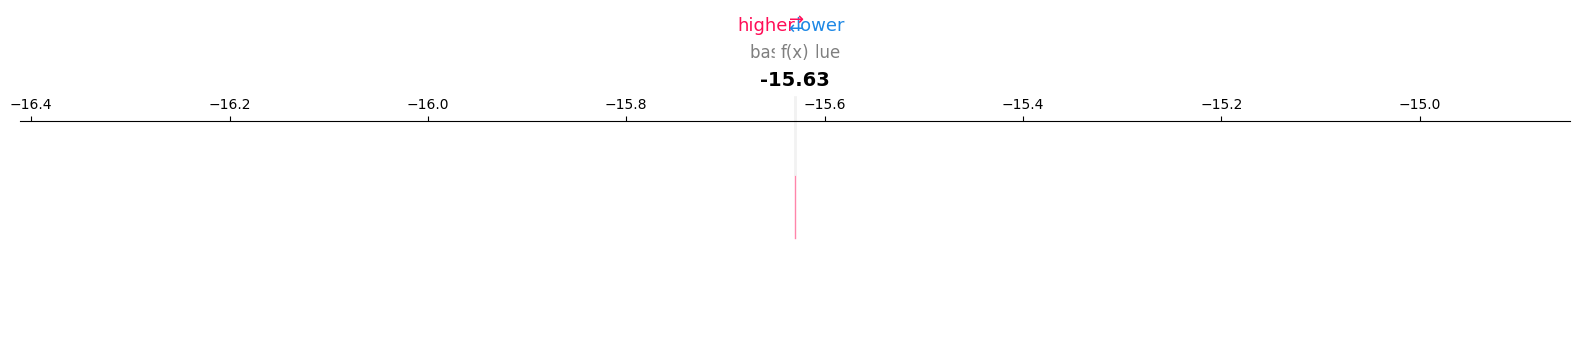

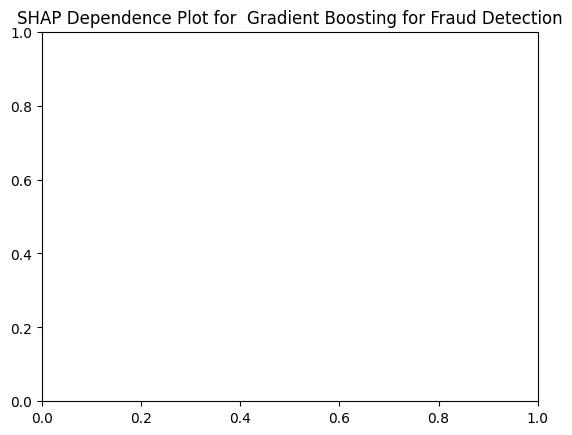

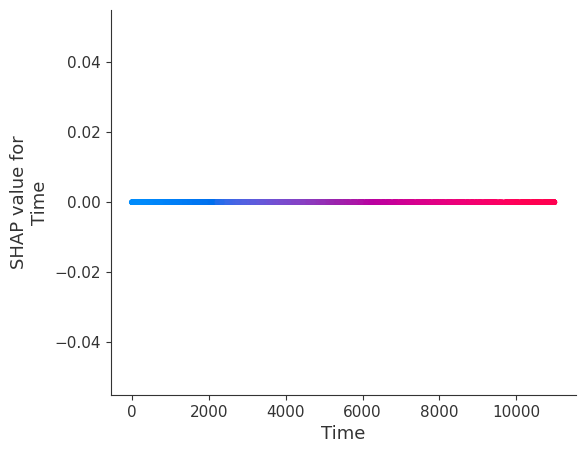

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


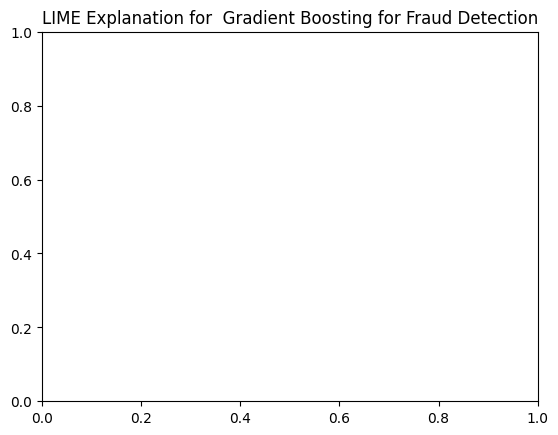

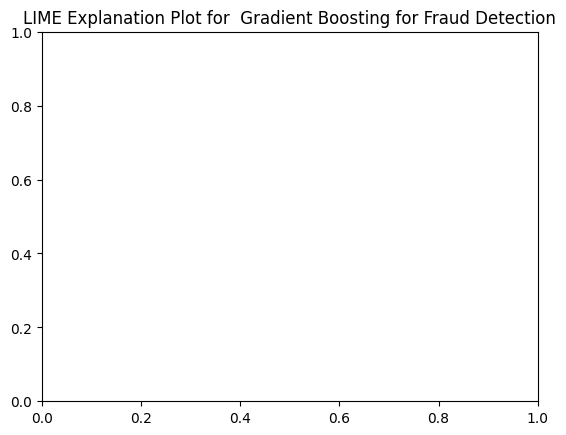

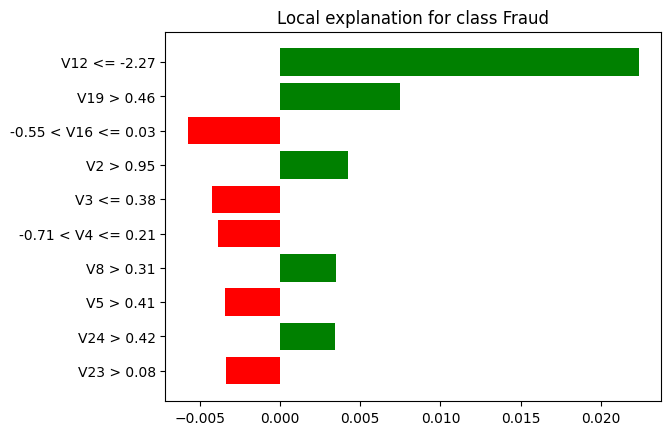

In [52]:
# Using SHAP to explain the logistic regression model for fraud detection
explain_model_with_shap(gb_credit, X_credit_test, " Gradient Boosting for Fraud Detection")

# Using LIME to explain the logistic regression model for fraud detection
explain_model_with_lime(gb_credit, X_credit_train, X_credit_test, " Gradient Boosting for Fraud Detection")

In [56]:
!zip -r /content/file.zip /content/mlruns

  adding: content/mlruns/ (stored 0%)
  adding: content/mlruns/0/ (stored 0%)
  adding: content/mlruns/0/meta.yaml (deflated 25%)
  adding: content/mlruns/0/b3ae442e2e1044aebc69cb3bc1ce1932/ (stored 0%)
  adding: content/mlruns/0/b3ae442e2e1044aebc69cb3bc1ce1932/tags/ (stored 0%)
  adding: content/mlruns/0/b3ae442e2e1044aebc69cb3bc1ce1932/tags/mlflow.runName (stored 0%)
  adding: content/mlruns/0/b3ae442e2e1044aebc69cb3bc1ce1932/tags/mlflow.log-model.history (deflated 42%)
  adding: content/mlruns/0/b3ae442e2e1044aebc69cb3bc1ce1932/tags/mlflow.user (stored 0%)
  adding: content/mlruns/0/b3ae442e2e1044aebc69cb3bc1ce1932/tags/mlflow.source.type (stored 0%)
  adding: content/mlruns/0/b3ae442e2e1044aebc69cb3bc1ce1932/tags/mlflow.source.name (deflated 5%)
  adding: content/mlruns/0/b3ae442e2e1044aebc69cb3bc1ce1932/meta.yaml (deflated 44%)
  adding: content/mlruns/0/b3ae442e2e1044aebc69cb3bc1ce1932/params/ (stored 0%)
  adding: content/mlruns/0/b3ae442e2e1044aebc69cb3bc1ce1932/params/model_t

In [57]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>